## Bank Customer Churn


#### Dhakshesh T - 1907009 - Team Lead - Team ID: PNT2022TMID52690

### 1.Importing necessary packages & Downloading the packages

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import numpy as np

### 2.Load the dataset

In [150]:
cust_df= pd.read_csv("Churn_Modelling.csv")
cust_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,NaN,1,79084.10,0


### 3. Perform visualizations

#### (i) Univariate Analysis

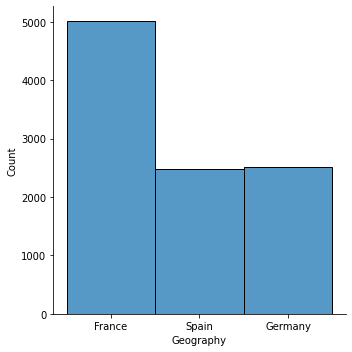

In [151]:
sns.displot(cust_df["Geography"])

<AxesSubplot:xlabel='index', ylabel='Exited'>

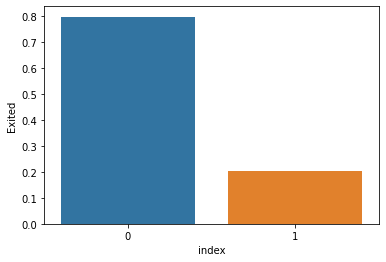

In [152]:
depth = cust_df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=depth,x='index',y='Exited')

<AxesSubplot:ylabel='Gender'>

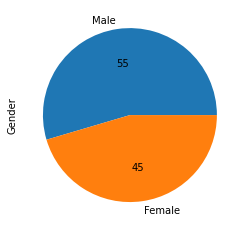

In [153]:
cust_df['Gender'].value_counts().plot(kind='pie',autopct='%.0f')

#### (ii) Bivariate Analysis

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

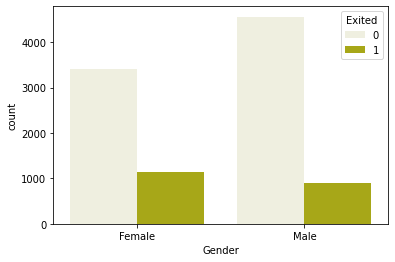

In [154]:
sns.countplot(cust_df['Gender'] ,hue = cust_df['Exited'] ,color ='y')

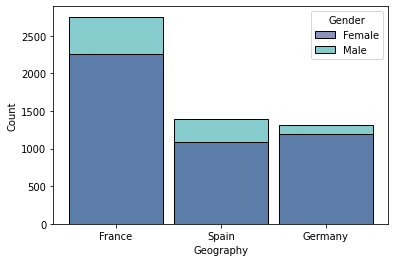

In [155]:
sns.histplot(cust_df, x = 'Geography', hue = 'Gender', palette = 'mako', alpha = 0.6, shrink = 0.9)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

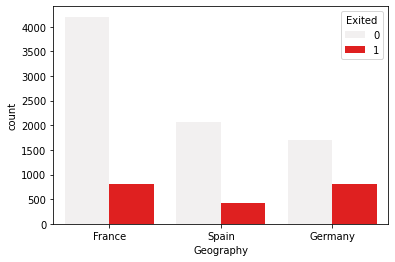

In [156]:
sns.countplot(cust_df['Geography'] ,hue= cust_df['Exited'] ,color ='r')

#### (iii) Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap : Continous Variables')

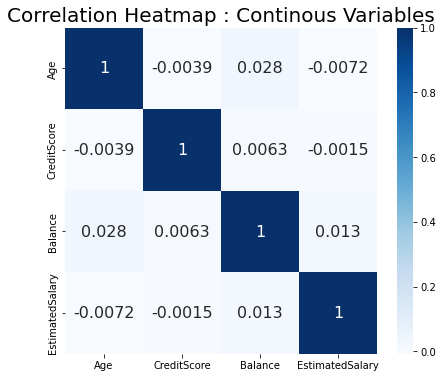

In [157]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cust_df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)
plt.rcParams['axes.titlesize'] = 20
ax.set_title("Correlation Heatmap : Continous Variables")

### 4. Descriptive Statistics

In [158]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9997 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        9997 non-null   float64
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [159]:
cust_df.std(numeric_only=True)

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.648282
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455880
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [160]:
cust_df.mean(numeric_only=True)

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505542e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.054116e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [161]:
cust_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,9997.0,6.505542e+02,96.648282,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,9997.0,7.054116e-01,0.455880,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### 5.Handling Missing Values

In [162]:
cust_df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore         True
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard           True
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [163]:
cust_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        3
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          3
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### It can be seen that CreditScore is a numerical value and that can be filled by using the mean value pertaining to the same attribute.

In [164]:
cust_df['CreditScore'] = cust_df['CreditScore'].fillna(cust_df['CreditScore'].mean())

#### It can be seen that HasCrCard is a categorical value and that can be filled by using the mode value pertaining to the same attribute.

In [165]:
cust_df['HasCrCard'] = cust_df['HasCrCard'].fillna(cust_df['HasCrCard'].mode()[0])

In [166]:
cust_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 6.Outlier Analysis and Removal

In [167]:
quantile  =  cust_df.quantile(q = [0.75,0.25])
q3 = quantile.iloc[0]
q1 = quantile.iloc[1]
iqr = q3 - q1

In [168]:
quantile

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0


In [169]:
upper_limit = q3 + 1.5 * iqr
print(upper_limit)
lower_limit = q1 - 1.5 * iqr
print(lower_limit)

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64
RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64


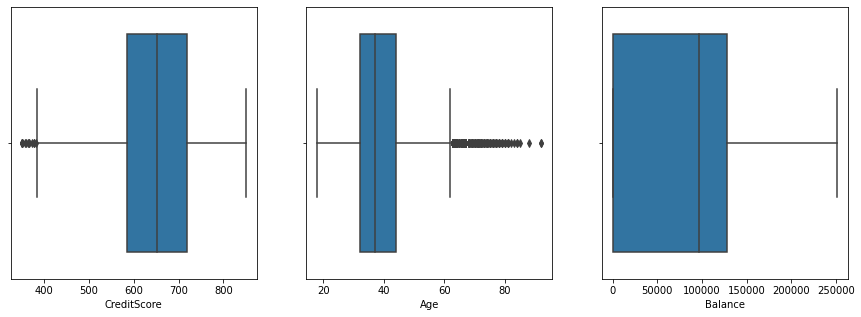

In [170]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=cust_df, x='CreditScore')
plt.subplot(1, 3, 2)
sns.boxplot(data=cust_df, x='Age')
plt.subplot(1, 3, 3)
sns.boxplot(data=cust_df, x='Balance')
plt.show()

In [171]:
outlier_variables = ['CreditScore','Age']
for i in outlier_variables:
        q1=cust_df[i].quantile(0.25)
        q3=cust_df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        cust_df[i]=np.where(cust_df[i] >upper, upper, cust_df[i])
        cust_df[i]=np.where(cust_df[i] <lower, lower, cust_df[i])

<AxesSubplot:xlabel='Age'>

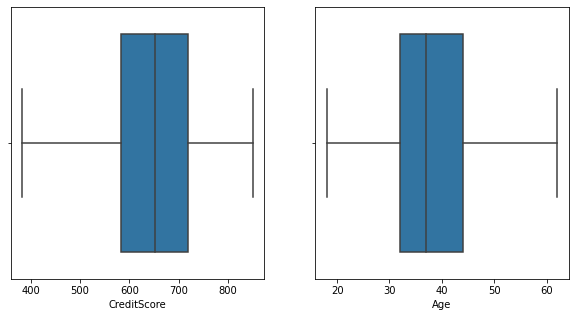

In [172]:
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=cust_df, x='CreditScore')
plt.subplot(1, 2, 2)
sns.boxplot(data=cust_df, x='Age')

### 7.Categorical Encoding

In [173]:
cust_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [174]:
cust_df["Gender"].replace({"Female":0,"Male":1},inplace = True)

In [175]:
cust_df["Geography"].replace({"France":0,"Spain":1,"Germany":2},inplace = True)

In [176]:
cust_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42.0,2,0.00,1,1.0,1,101348.88,1
1,2,15647311,Hill,608.0,1,0,41.0,1,83807.86,1,0.0,1,112542.58,0
2,3,15619304,Onio,502.0,0,0,42.0,8,159660.80,3,1.0,0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39.0,1,0.00,2,0.0,0,93826.63,0
4,5,15737888,Mitchell,850.0,1,0,43.0,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,0,1,39.0,5,0.00,2,1.0,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,0,1,35.0,10,57369.61,1,1.0,1,101699.77,0
9997,9998,15584532,Liu,709.0,0,0,36.0,7,0.00,1,0.0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,2,1,42.0,3,75075.31,2,1.0,0,92888.52,1


### 8. Split the data to dependant and independant variables

In [177]:
X = cust_df.iloc[:,3:-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42.0,2,0.00,1,1.0,1,101348.88
1,608.0,1,0,41.0,1,83807.86,1,0.0,1,112542.58
2,502.0,0,0,42.0,8,159660.80,3,1.0,0,113931.57
3,699.0,0,0,39.0,1,0.00,2,0.0,0,93826.63
4,850.0,1,0,43.0,2,125510.82,1,1.0,1,79084.10


In [178]:
y= cust_df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### 9. Scale Independant Variables

In [179]:
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler()
X = Scaling.fit_transform(X)
X

array([[-0.32720656, -0.9025865 , -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44115566,  0.301665  , -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53921061, -0.9025865 , -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60510425, -0.9025865 , -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25772182,  1.50591651,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.464902  , -0.9025865 , -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

### 10. Split into training and testing data

In [180]:
train_df, test_df = train_test_split(cust_df, test_size=0.2, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 8000 rows x 14 columns
 Test set: 2000 rows x 14 columns
